## Group 03:
- Veronica Bedin, 2097013
- Robert Bhatti, 
- Diego Bonato,  
- Michail Sapkas, 


# 1) Implement a grid search

## Structure of the Procedure

Constructing a Deep Neural Network to solve ML problems is a multiple-stage process. Quite generally, one can identify the key steps as follows:

* ***step 1:*** Load and process the data
* ***step 2:*** Define the model and its architecture
* ***step 3:*** Choose the optimizer and the cost function
* ***step 4:*** Train the model 
* ***step 5:*** Evaluate the model performance on the *unseen* test data
* ***step 6:*** Modify the hyperparameters to optimize performance for the specific data set

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout
#suppresses tensorflow warnings
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

2023-03-06 10:50:07.862384: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 10:50:08.279023: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-06 10:50:08.279070: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-06 10:50:09.234528: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## 1.1 Load and process the data

In [2]:
#filename is a function that completes the address
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print("Number of samples", N, "\nNumber of dimensions of each sample", L)
for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'Data: {N}\tTrain: {N_train}')


Number of samples 4000 
Number of dimensions of each sample 2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
Data: 4000	Train: 3200


## 1.2 Split train/test

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


## 1.3 Rescale input data
We can use this kind of simple rescaling as we know the input data is limited to a fixed interval

In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [5]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

## 2 Define the model and its architecture
## 3 Choose optimizer and cost function 

In [6]:
def compile_model(activation='relu', loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], dropout=0.2):
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(L,input_shape=(L,), activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dropout(rate=dropout))
    model.add(Dense(1,activation='sigmoid'))
    # compile the model
    model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=metrics)

    return model

## 4 Train the model 

In [7]:
# training parameters
batch_size = 50
nepoch=400

# create the deep neural net
model_DNN=compile_model()

# train DNN and store training info in history
history=model_DNN.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nepoch,
          verbose=2,
          validation_data=(x_valid, y_valid))

Model compiled successfully! Optimizer:  adam  Activation:  relu


2023-03-06 10:50:11.076563: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-06 10:50:11.076809: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-06 10:50:11.076824: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Veronica-Ideapad): /proc/driver/nvidia/version does not exist
2023-03-06 10:50:11.077655: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/400
64/64 - 1s - loss: 0.6839 - accuracy: 0.5300 - val_loss: 0.6729 - val_accuracy: 0.6300 - 994ms/epoch - 16ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6590 - accuracy: 0.6556 - val_loss: 0.6437 - val_accuracy: 0.6612 - 152ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.6279 - accuracy: 0.6828 - val_loss: 0.6124 - val_accuracy: 0.6925 - 99ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5951 - accuracy: 0.7147 - val_loss: 0.5823 - val_accuracy: 0.7188 - 98ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5535 - accuracy: 0.7419 - val_loss: 0.5461 - val_accuracy: 0.7300 - 125ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.5270 - accuracy: 0.7428 - val_loss: 0.5110 - val_accuracy: 0.7437 - 121ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.5052 - accuracy: 0.7431 - val_loss: 0.4877 - val_accuracy: 0.7450 - 162ms/epoch - 3ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4906 - accuracy: 0.7456 - val_loss: 0.4681 - val_accuracy: 0.7487 - 110ms/epoch - 2ms/step
Epoch 9/4

Epoch 67/400
64/64 - 0s - loss: 0.2516 - accuracy: 0.8728 - val_loss: 0.2130 - val_accuracy: 0.8925 - 117ms/epoch - 2ms/step
Epoch 68/400
64/64 - 0s - loss: 0.2545 - accuracy: 0.8750 - val_loss: 0.2124 - val_accuracy: 0.8950 - 110ms/epoch - 2ms/step
Epoch 69/400
64/64 - 0s - loss: 0.2516 - accuracy: 0.8744 - val_loss: 0.2193 - val_accuracy: 0.8913 - 131ms/epoch - 2ms/step
Epoch 70/400
64/64 - 0s - loss: 0.2531 - accuracy: 0.8725 - val_loss: 0.2213 - val_accuracy: 0.8900 - 120ms/epoch - 2ms/step
Epoch 71/400
64/64 - 0s - loss: 0.2528 - accuracy: 0.8747 - val_loss: 0.2108 - val_accuracy: 0.8963 - 114ms/epoch - 2ms/step
Epoch 72/400
64/64 - 0s - loss: 0.2509 - accuracy: 0.8759 - val_loss: 0.2136 - val_accuracy: 0.8950 - 137ms/epoch - 2ms/step
Epoch 73/400
64/64 - 0s - loss: 0.2515 - accuracy: 0.8753 - val_loss: 0.2175 - val_accuracy: 0.8900 - 142ms/epoch - 2ms/step
Epoch 74/400
64/64 - 0s - loss: 0.2496 - accuracy: 0.8731 - val_loss: 0.2178 - val_accuracy: 0.8950 - 135ms/epoch - 2ms/step


Epoch 133/400
64/64 - 0s - loss: 0.2292 - accuracy: 0.8994 - val_loss: 0.1942 - val_accuracy: 0.9112 - 146ms/epoch - 2ms/step
Epoch 134/400
64/64 - 0s - loss: 0.2311 - accuracy: 0.9003 - val_loss: 0.2062 - val_accuracy: 0.9137 - 126ms/epoch - 2ms/step
Epoch 135/400
64/64 - 0s - loss: 0.2249 - accuracy: 0.9006 - val_loss: 0.1914 - val_accuracy: 0.9100 - 164ms/epoch - 3ms/step
Epoch 136/400
64/64 - 0s - loss: 0.2231 - accuracy: 0.9034 - val_loss: 0.1887 - val_accuracy: 0.9137 - 122ms/epoch - 2ms/step
Epoch 137/400
64/64 - 0s - loss: 0.2203 - accuracy: 0.9044 - val_loss: 0.2007 - val_accuracy: 0.9125 - 178ms/epoch - 3ms/step
Epoch 138/400
64/64 - 0s - loss: 0.2258 - accuracy: 0.8984 - val_loss: 0.2004 - val_accuracy: 0.9150 - 122ms/epoch - 2ms/step
Epoch 139/400
64/64 - 0s - loss: 0.2266 - accuracy: 0.8969 - val_loss: 0.1926 - val_accuracy: 0.9125 - 164ms/epoch - 3ms/step
Epoch 140/400
64/64 - 0s - loss: 0.2227 - accuracy: 0.9016 - val_loss: 0.1906 - val_accuracy: 0.9200 - 96ms/epoch - 1m

64/64 - 0s - loss: 0.1797 - accuracy: 0.9166 - val_loss: 0.1468 - val_accuracy: 0.9388 - 161ms/epoch - 3ms/step
Epoch 199/400
64/64 - 0s - loss: 0.1808 - accuracy: 0.9191 - val_loss: 0.1435 - val_accuracy: 0.9400 - 119ms/epoch - 2ms/step
Epoch 200/400
64/64 - 0s - loss: 0.1764 - accuracy: 0.9175 - val_loss: 0.1416 - val_accuracy: 0.9375 - 170ms/epoch - 3ms/step
Epoch 201/400
64/64 - 0s - loss: 0.1758 - accuracy: 0.9219 - val_loss: 0.1454 - val_accuracy: 0.9325 - 125ms/epoch - 2ms/step
Epoch 202/400
64/64 - 0s - loss: 0.1704 - accuracy: 0.9225 - val_loss: 0.1440 - val_accuracy: 0.9425 - 138ms/epoch - 2ms/step
Epoch 203/400
64/64 - 0s - loss: 0.1758 - accuracy: 0.9206 - val_loss: 0.1595 - val_accuracy: 0.9337 - 114ms/epoch - 2ms/step
Epoch 204/400
64/64 - 0s - loss: 0.1739 - accuracy: 0.9225 - val_loss: 0.1414 - val_accuracy: 0.9337 - 163ms/epoch - 3ms/step
Epoch 205/400
64/64 - 0s - loss: 0.1832 - accuracy: 0.9175 - val_loss: 0.1603 - val_accuracy: 0.9425 - 124ms/epoch - 2ms/step
Epoch 

Epoch 264/400
64/64 - 0s - loss: 0.1313 - accuracy: 0.9372 - val_loss: 0.1232 - val_accuracy: 0.9475 - 122ms/epoch - 2ms/step
Epoch 265/400
64/64 - 0s - loss: 0.1359 - accuracy: 0.9413 - val_loss: 0.0982 - val_accuracy: 0.9688 - 137ms/epoch - 2ms/step
Epoch 266/400
64/64 - 0s - loss: 0.1361 - accuracy: 0.9372 - val_loss: 0.1020 - val_accuracy: 0.9625 - 157ms/epoch - 2ms/step
Epoch 267/400
64/64 - 0s - loss: 0.1287 - accuracy: 0.9431 - val_loss: 0.1277 - val_accuracy: 0.9488 - 97ms/epoch - 2ms/step
Epoch 268/400
64/64 - 0s - loss: 0.1336 - accuracy: 0.9419 - val_loss: 0.1090 - val_accuracy: 0.9575 - 157ms/epoch - 2ms/step
Epoch 269/400
64/64 - 0s - loss: 0.1258 - accuracy: 0.9394 - val_loss: 0.1052 - val_accuracy: 0.9588 - 129ms/epoch - 2ms/step
Epoch 270/400
64/64 - 0s - loss: 0.1230 - accuracy: 0.9425 - val_loss: 0.1002 - val_accuracy: 0.9675 - 127ms/epoch - 2ms/step
Epoch 271/400
64/64 - 0s - loss: 0.1220 - accuracy: 0.9488 - val_loss: 0.1019 - val_accuracy: 0.9613 - 115ms/epoch - 2m

64/64 - 0s - loss: 0.0947 - accuracy: 0.9581 - val_loss: 0.0800 - val_accuracy: 0.9688 - 131ms/epoch - 2ms/step
Epoch 330/400
64/64 - 0s - loss: 0.0987 - accuracy: 0.9616 - val_loss: 0.0793 - val_accuracy: 0.9663 - 135ms/epoch - 2ms/step
Epoch 331/400
64/64 - 0s - loss: 0.0924 - accuracy: 0.9600 - val_loss: 0.0776 - val_accuracy: 0.9712 - 115ms/epoch - 2ms/step
Epoch 332/400
64/64 - 0s - loss: 0.0933 - accuracy: 0.9603 - val_loss: 0.0808 - val_accuracy: 0.9625 - 119ms/epoch - 2ms/step
Epoch 333/400
64/64 - 0s - loss: 0.0897 - accuracy: 0.9619 - val_loss: 0.0884 - val_accuracy: 0.9575 - 162ms/epoch - 3ms/step
Epoch 334/400
64/64 - 0s - loss: 0.0919 - accuracy: 0.9619 - val_loss: 0.0820 - val_accuracy: 0.9663 - 122ms/epoch - 2ms/step
Epoch 335/400
64/64 - 0s - loss: 0.0911 - accuracy: 0.9613 - val_loss: 0.0883 - val_accuracy: 0.9638 - 139ms/epoch - 2ms/step
Epoch 336/400
64/64 - 0s - loss: 0.0940 - accuracy: 0.9616 - val_loss: 0.0753 - val_accuracy: 0.9663 - 116ms/epoch - 2ms/step
Epoch 

Epoch 395/400
64/64 - 0s - loss: 0.0730 - accuracy: 0.9691 - val_loss: 0.0611 - val_accuracy: 0.9750 - 125ms/epoch - 2ms/step
Epoch 396/400
64/64 - 0s - loss: 0.0759 - accuracy: 0.9681 - val_loss: 0.0518 - val_accuracy: 0.9800 - 145ms/epoch - 2ms/step
Epoch 397/400
64/64 - 0s - loss: 0.0761 - accuracy: 0.9666 - val_loss: 0.0788 - val_accuracy: 0.9688 - 124ms/epoch - 2ms/step
Epoch 398/400
64/64 - 0s - loss: 0.0713 - accuracy: 0.9709 - val_loss: 0.0644 - val_accuracy: 0.9737 - 117ms/epoch - 2ms/step
Epoch 399/400
64/64 - 0s - loss: 0.0661 - accuracy: 0.9722 - val_loss: 0.0627 - val_accuracy: 0.9725 - 121ms/epoch - 2ms/step
Epoch 400/400
64/64 - 0s - loss: 0.0635 - accuracy: 0.9719 - val_loss: 0.0543 - val_accuracy: 0.9750 - 152ms/epoch - 2ms/step


## 5 Evaluate the model performance on the *unseen* test data

25/25 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9750

Test loss: 0.05431622639298439
Test accuracy: 0.9750000238418579


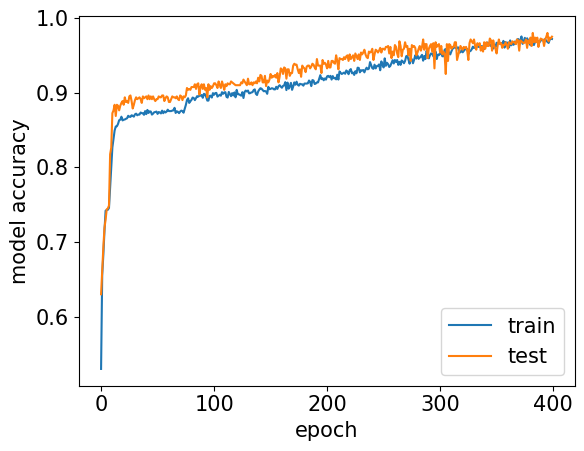

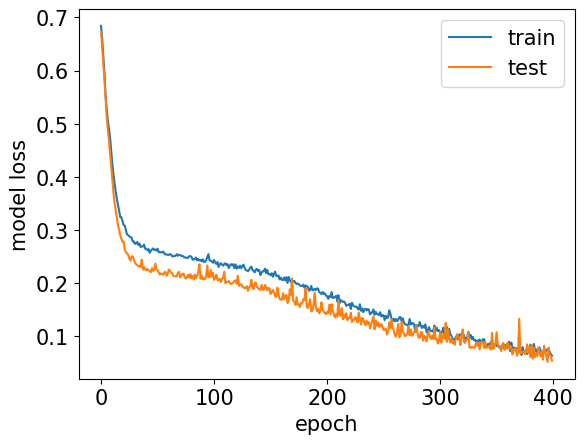

In [8]:
# Evaluate model
score = model_DNN.evaluate(x_valid, y_valid, verbose=1)

# Print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Look into training history
# Fit returns a History object. 
# Its History.history attribute is a record of training loss values and metrics values at successive epochs, 
# as well as validation loss values and validation metrics values.
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

The results we get are not that good, we go to step 6 and look which parameters can be better tuned
## 6 Modify the hyperparameters to optimize performance for the specific data set
### Find the best *optimizer* and *activation function*

In [28]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=50, 
                        batch_size=batch_size, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential' ]
# define parameter dictionary
param_grid = dict(optimizer=optimizer, activation=activation)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/tmp/ipykernel_95516/3182205465.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=compile_model,


Model compiled successfully! Optimizer:  SGD  Activation:  relu
Model compiled successfully! Optimizer:  SGD  Activation:  relu
Model compiled successfully! Optimizer:  SGD  Activation:  relu
Model compiled successfully! Optimizer:  SGD  Activation:  relu
Model compiled successfully! Optimizer:  RMSprop  Activation:  relu
Model compiled successfully! Optimizer:  RMSprop  Activation:  relu
Model compiled successfully! Optimizer:  RMSprop  Activation:  relu
Model compiled successfully! Optimizer:  RMSprop  Activation:  relu
Model compiled successfully! Optimizer:  Adagrad  Activation:  relu
Model compiled successfully! Optimizer:  Adagrad  Activation:  relu
Model compiled successfully! Optimizer:  Adagrad  Activation:  relu
Model compiled successfully! Optimizer:  Adagrad  Activation:  relu
Model compiled successfully! Optimizer:  Adadelta  Activation:  relu
Model compiled successfully! Optimizer:  Adadelta  Activation:  relu
Model compiled successfully! Optimizer:  Adadelta  Activation:

Model compiled successfully! Optimizer:  RMSprop  Activation:  softsign
Model compiled successfully! Optimizer:  Adagrad  Activation:  softsign
Model compiled successfully! Optimizer:  Adagrad  Activation:  softsign
Model compiled successfully! Optimizer:  Adagrad  Activation:  softsign
Model compiled successfully! Optimizer:  Adagrad  Activation:  softsign
Model compiled successfully! Optimizer:  Adadelta  Activation:  softsign
Model compiled successfully! Optimizer:  Adadelta  Activation:  softsign
Model compiled successfully! Optimizer:  Adadelta  Activation:  softsign
Model compiled successfully! Optimizer:  Adadelta  Activation:  softsign
Model compiled successfully! Optimizer:  Adam  Activation:  softsign
Model compiled successfully! Optimizer:  Adam  Activation:  softsign
Model compiled successfully! Optimizer:  Adam  Activation:  softsign
Model compiled successfully! Optimizer:  Adam  Activation:  softsign
Model compiled successfully! Optimizer:  Adamax  Activation:  softsign
M

Model compiled successfully! Optimizer:  Adam  Activation:  exponential
Model compiled successfully! Optimizer:  Adam  Activation:  exponential
Model compiled successfully! Optimizer:  Adam  Activation:  exponential
Model compiled successfully! Optimizer:  Adam  Activation:  exponential
Model compiled successfully! Optimizer:  Adamax  Activation:  exponential
Model compiled successfully! Optimizer:  Adamax  Activation:  exponential
Model compiled successfully! Optimizer:  Adamax  Activation:  exponential
Model compiled successfully! Optimizer:  Adamax  Activation:  exponential
Model compiled successfully! Optimizer:  Nadam  Activation:  exponential
Model compiled successfully! Optimizer:  Nadam  Activation:  exponential
Model compiled successfully! Optimizer:  Nadam  Activation:  exponential
Model compiled successfully! Optimizer:  Nadam  Activation:  exponential
Model compiled successfully! Optimizer:  Nadam  Activation:  selu
Best: 0.938438 using {'activation': 'selu', 'optimizer': '

In [61]:
clf= grid_result.best_estimator_
print(clf)

### We found the best optimizer and activation
Let's see how the results change 

In [30]:
# training parameters
batch_size = 50
nepoch=400

# create the deep neural net
#model_DNN=compile_model(activation='relu', loss='binary_crossentropy', optimizer='Nadam')

# train DNN and store training info in history
history=clf.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nepoch,
          verbose=2,
          validation_data=(x_valid, y_valid))

Model compiled successfully! Optimizer:  Nadam  Activation:  selu
Epoch 1/400
64/64 - 2s - loss: 0.6830 - accuracy: 0.6069 - val_loss: 0.6049 - val_accuracy: 0.6762 - 2s/epoch - 26ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6016 - accuracy: 0.6841 - val_loss: 0.5916 - val_accuracy: 0.6988 - 131ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.5847 - accuracy: 0.6922 - val_loss: 0.5830 - val_accuracy: 0.7113 - 129ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5769 - accuracy: 0.7131 - val_loss: 0.5695 - val_accuracy: 0.7287 - 132ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5646 - accuracy: 0.7222 - val_loss: 0.5527 - val_accuracy: 0.7200 - 113ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.5473 - accuracy: 0.7409 - val_loss: 0.5390 - val_accuracy: 0.7300 - 109ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.5379 - accuracy: 0.7462 - val_loss: 0.5249 - val_accuracy: 0.7688 - 116ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.5241 - accuracy: 0.7531 - val_loss:

64/64 - 0s - loss: 0.0901 - accuracy: 0.9669 - val_loss: 0.0873 - val_accuracy: 0.9625 - 137ms/epoch - 2ms/step
Epoch 67/400
64/64 - 0s - loss: 0.0883 - accuracy: 0.9706 - val_loss: 0.0737 - val_accuracy: 0.9750 - 116ms/epoch - 2ms/step
Epoch 68/400
64/64 - 0s - loss: 0.0840 - accuracy: 0.9684 - val_loss: 0.0801 - val_accuracy: 0.9712 - 120ms/epoch - 2ms/step
Epoch 69/400
64/64 - 0s - loss: 0.0857 - accuracy: 0.9678 - val_loss: 0.0718 - val_accuracy: 0.9800 - 132ms/epoch - 2ms/step
Epoch 70/400
64/64 - 0s - loss: 0.0897 - accuracy: 0.9653 - val_loss: 0.0684 - val_accuracy: 0.9800 - 123ms/epoch - 2ms/step
Epoch 71/400
64/64 - 0s - loss: 0.0871 - accuracy: 0.9678 - val_loss: 0.0811 - val_accuracy: 0.9650 - 132ms/epoch - 2ms/step
Epoch 72/400
64/64 - 0s - loss: 0.0842 - accuracy: 0.9700 - val_loss: 0.0720 - val_accuracy: 0.9725 - 145ms/epoch - 2ms/step
Epoch 73/400
64/64 - 0s - loss: 0.0824 - accuracy: 0.9706 - val_loss: 0.0870 - val_accuracy: 0.9688 - 133ms/epoch - 2ms/step
Epoch 74/400


Epoch 132/400
64/64 - 0s - loss: 0.0548 - accuracy: 0.9791 - val_loss: 0.0398 - val_accuracy: 0.9850 - 127ms/epoch - 2ms/step
Epoch 133/400
64/64 - 0s - loss: 0.0564 - accuracy: 0.9794 - val_loss: 0.0431 - val_accuracy: 0.9837 - 126ms/epoch - 2ms/step
Epoch 134/400
64/64 - 0s - loss: 0.0630 - accuracy: 0.9737 - val_loss: 0.0433 - val_accuracy: 0.9775 - 119ms/epoch - 2ms/step
Epoch 135/400
64/64 - 0s - loss: 0.0472 - accuracy: 0.9844 - val_loss: 0.0532 - val_accuracy: 0.9750 - 122ms/epoch - 2ms/step
Epoch 136/400
64/64 - 0s - loss: 0.0509 - accuracy: 0.9769 - val_loss: 0.0985 - val_accuracy: 0.9575 - 127ms/epoch - 2ms/step
Epoch 137/400
64/64 - 0s - loss: 0.0568 - accuracy: 0.9759 - val_loss: 0.0458 - val_accuracy: 0.9800 - 124ms/epoch - 2ms/step
Epoch 138/400
64/64 - 0s - loss: 0.0504 - accuracy: 0.9803 - val_loss: 0.0439 - val_accuracy: 0.9825 - 128ms/epoch - 2ms/step
Epoch 139/400
64/64 - 0s - loss: 0.0492 - accuracy: 0.9803 - val_loss: 0.0363 - val_accuracy: 0.9887 - 125ms/epoch - 2

64/64 - 0s - loss: 0.0428 - accuracy: 0.9841 - val_loss: 0.0481 - val_accuracy: 0.9787 - 118ms/epoch - 2ms/step
Epoch 198/400
64/64 - 0s - loss: 0.0463 - accuracy: 0.9834 - val_loss: 0.1182 - val_accuracy: 0.9525 - 134ms/epoch - 2ms/step
Epoch 199/400
64/64 - 0s - loss: 0.0456 - accuracy: 0.9797 - val_loss: 0.0641 - val_accuracy: 0.9663 - 138ms/epoch - 2ms/step
Epoch 200/400
64/64 - 0s - loss: 0.0560 - accuracy: 0.9775 - val_loss: 0.0432 - val_accuracy: 0.9825 - 148ms/epoch - 2ms/step
Epoch 201/400
64/64 - 0s - loss: 0.0410 - accuracy: 0.9822 - val_loss: 0.0313 - val_accuracy: 0.9900 - 123ms/epoch - 2ms/step
Epoch 202/400
64/64 - 0s - loss: 0.0501 - accuracy: 0.9794 - val_loss: 0.0487 - val_accuracy: 0.9775 - 119ms/epoch - 2ms/step
Epoch 203/400
64/64 - 0s - loss: 0.0388 - accuracy: 0.9859 - val_loss: 0.0498 - val_accuracy: 0.9762 - 127ms/epoch - 2ms/step
Epoch 204/400
64/64 - 0s - loss: 0.0456 - accuracy: 0.9784 - val_loss: 0.0369 - val_accuracy: 0.9837 - 124ms/epoch - 2ms/step
Epoch 

Epoch 263/400
64/64 - 0s - loss: 0.0479 - accuracy: 0.9809 - val_loss: 0.0321 - val_accuracy: 0.9850 - 130ms/epoch - 2ms/step
Epoch 264/400
64/64 - 0s - loss: 0.0407 - accuracy: 0.9828 - val_loss: 0.0511 - val_accuracy: 0.9737 - 122ms/epoch - 2ms/step
Epoch 265/400
64/64 - 0s - loss: 0.0436 - accuracy: 0.9812 - val_loss: 0.0548 - val_accuracy: 0.9725 - 118ms/epoch - 2ms/step
Epoch 266/400
64/64 - 0s - loss: 0.0450 - accuracy: 0.9791 - val_loss: 0.0605 - val_accuracy: 0.9712 - 120ms/epoch - 2ms/step
Epoch 267/400
64/64 - 0s - loss: 0.0428 - accuracy: 0.9812 - val_loss: 0.0791 - val_accuracy: 0.9663 - 119ms/epoch - 2ms/step
Epoch 268/400
64/64 - 0s - loss: 0.0448 - accuracy: 0.9819 - val_loss: 0.0463 - val_accuracy: 0.9775 - 118ms/epoch - 2ms/step
Epoch 269/400
64/64 - 0s - loss: 0.0415 - accuracy: 0.9828 - val_loss: 0.0298 - val_accuracy: 0.9875 - 116ms/epoch - 2ms/step
Epoch 270/400
64/64 - 0s - loss: 0.0393 - accuracy: 0.9834 - val_loss: 0.0350 - val_accuracy: 0.9837 - 113ms/epoch - 2

64/64 - 0s - loss: 0.0395 - accuracy: 0.9834 - val_loss: 0.0561 - val_accuracy: 0.9762 - 121ms/epoch - 2ms/step
Epoch 329/400
64/64 - 0s - loss: 0.0405 - accuracy: 0.9787 - val_loss: 0.0297 - val_accuracy: 0.9900 - 123ms/epoch - 2ms/step
Epoch 330/400
64/64 - 0s - loss: 0.0517 - accuracy: 0.9809 - val_loss: 0.0307 - val_accuracy: 0.9900 - 124ms/epoch - 2ms/step
Epoch 331/400
64/64 - 0s - loss: 0.0332 - accuracy: 0.9875 - val_loss: 0.0529 - val_accuracy: 0.9775 - 123ms/epoch - 2ms/step
Epoch 332/400
64/64 - 0s - loss: 0.0437 - accuracy: 0.9831 - val_loss: 0.0443 - val_accuracy: 0.9787 - 116ms/epoch - 2ms/step
Epoch 333/400
64/64 - 0s - loss: 0.0401 - accuracy: 0.9831 - val_loss: 0.0306 - val_accuracy: 0.9887 - 122ms/epoch - 2ms/step
Epoch 334/400
64/64 - 0s - loss: 0.0538 - accuracy: 0.9769 - val_loss: 0.0457 - val_accuracy: 0.9800 - 119ms/epoch - 2ms/step
Epoch 335/400
64/64 - 0s - loss: 0.0404 - accuracy: 0.9831 - val_loss: 0.0463 - val_accuracy: 0.9750 - 117ms/epoch - 2ms/step
Epoch 

Epoch 394/400
64/64 - 0s - loss: 0.0429 - accuracy: 0.9822 - val_loss: 0.0363 - val_accuracy: 0.9837 - 130ms/epoch - 2ms/step
Epoch 395/400
64/64 - 0s - loss: 0.0470 - accuracy: 0.9819 - val_loss: 0.0346 - val_accuracy: 0.9837 - 118ms/epoch - 2ms/step
Epoch 396/400
64/64 - 0s - loss: 0.0381 - accuracy: 0.9847 - val_loss: 0.0487 - val_accuracy: 0.9762 - 116ms/epoch - 2ms/step
Epoch 397/400
64/64 - 0s - loss: 0.0393 - accuracy: 0.9844 - val_loss: 0.0364 - val_accuracy: 0.9850 - 131ms/epoch - 2ms/step
Epoch 398/400
64/64 - 0s - loss: 0.0397 - accuracy: 0.9847 - val_loss: 0.0514 - val_accuracy: 0.9762 - 118ms/epoch - 2ms/step
Epoch 399/400
64/64 - 0s - loss: 0.0384 - accuracy: 0.9856 - val_loss: 0.0302 - val_accuracy: 0.9900 - 118ms/epoch - 2ms/step
Epoch 400/400
64/64 - 0s - loss: 0.0309 - accuracy: 0.9875 - val_loss: 0.0310 - val_accuracy: 0.9875 - 131ms/epoch - 2ms/step


16/16 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9875

Test accuracy: 0.987500011920929


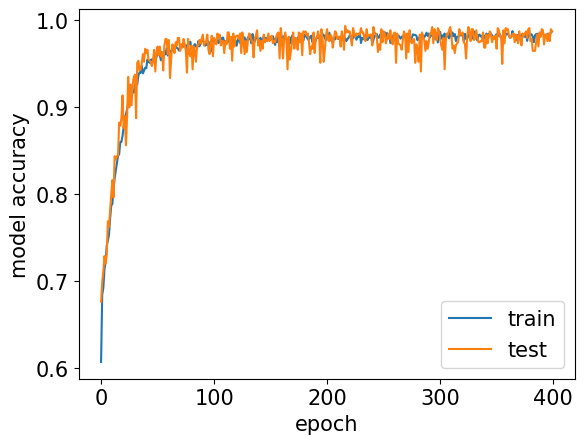

In [31]:
# Evaluate model
score = clf.score(x_valid, y_valid,verbose=1)

# Print performance
print()
print('Test accuracy:', score)

# Look into training history
# Fit returns a History object. 
# Its History.history attribute is a record of training loss values and metrics values at successive epochs, 
# as well as validation loss values and validation metrics values.
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


# 2) How do performances change with N?

## 1. Reduced

<function matplotlib.pyplot.show(close=None, block=None)>

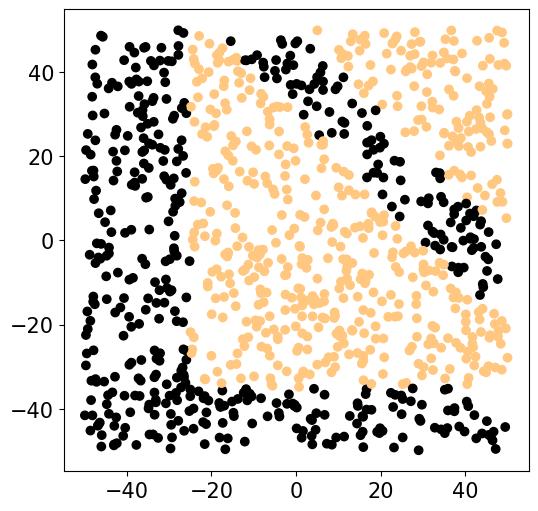

In [42]:
N=1000
B=100
x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap=cm.copper)
plt.show

In [43]:
perc_train=0.8
N_train = int(perc_train * N)

(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50    #size of the box above, rescaling it to 50 it gives 0 from 1

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

Train: 800 	 Validation: 200


In [44]:
fit = clf.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=False)

Model compiled successfully! Optimizer:  Nadam  Activation:  selu


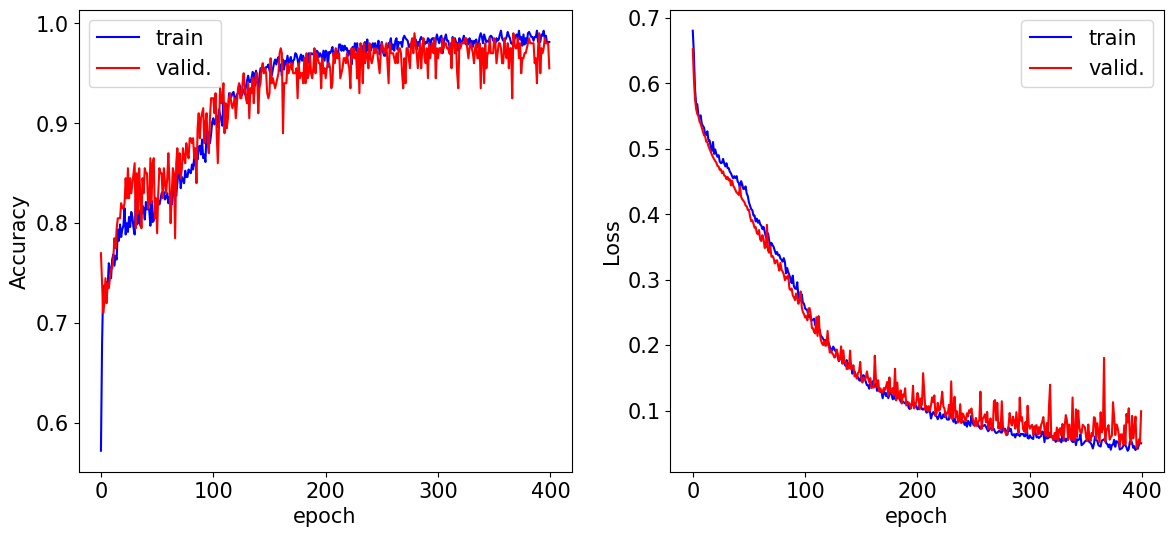

In [45]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

4/4 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.9550

Test accuracy: 0.9549999833106995


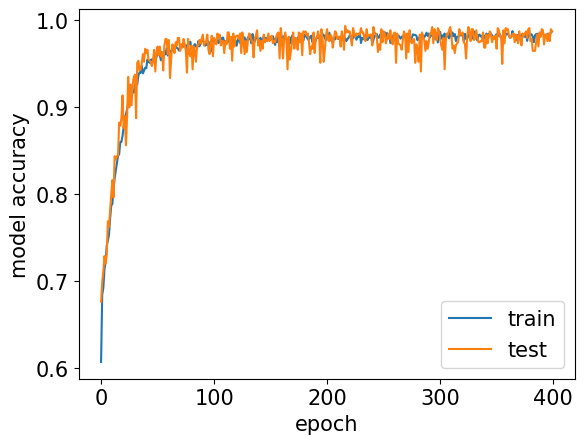

In [46]:
# Evaluate model
score = clf.score(x_valid, y_valid,verbose=1)

# Print performance
print()
print('Test accuracy:', score)

# Look into training history
# Fit returns a History object. 
# Its History.history attribute is a record of training loss values and metrics values at successive epochs, 
# as well as validation loss values and validation metrics values.
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## 2. Increase

<function matplotlib.pyplot.show(close=None, block=None)>

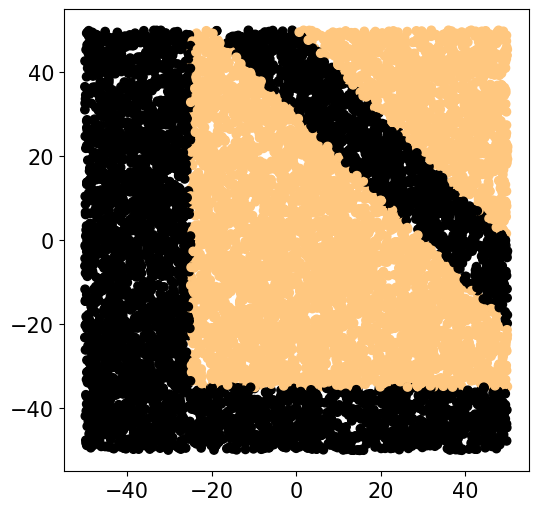

In [34]:
import matplotlib.cm as cm
N=10000
B=100
x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap=cm.copper)
plt.show

In [35]:
perc_train=0.8
N_train = int(perc_train * N)

(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50    #size of the box above, rescaling it to 50 it gives 0 from 1

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

Train: 8000 	 Validation: 2000


In [36]:
fit = clf.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=False)

Model compiled successfully! Optimizer:  Nadam  Activation:  selu


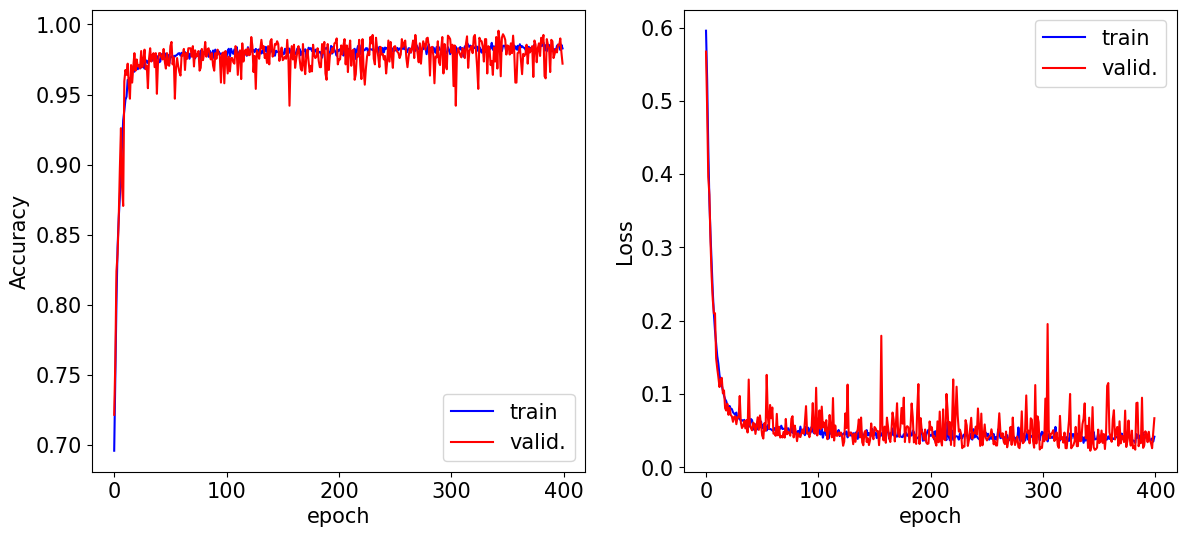

In [37]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

40/40 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 0.9720

Test accuracy: 0.972000002861023


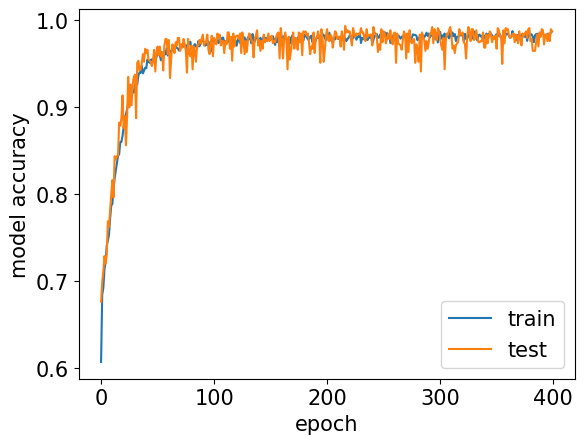

In [41]:
# Evaluate model
score = clf.score(x_valid, y_valid,verbose=1)

# Print performance
print()
print('Test accuracy:', score)

# Look into training history
# Fit returns a History object. 
# Its History.history attribute is a record of training loss values and metrics values at successive epochs, 
# as well as validation loss values and validation metrics values.
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## 3. Augmented

In [48]:
# dataset Augmentation function 
 
def augm(X,Y,N): 
    #calc the standard deviation of column 1 and 2 we are gonna use it to add the apropriate noise 
    std1 , std2 = np.std(X[:,0]) , np.std(X[:,1]) 
    #crete a bunch of empty lists to store the augmented samples 
    x_aug_col1 = [] 
    x_aug_col2 = [] 
    y_new = [] 
    #loop over the extra N samples we want our dataset to be augmented 
    for i in range(N): 
        #draw a random index from the original dataset 
        ix = np.random.choice(len(X)) 
         
        #append to the lists created above  
        x_aug_col1 = np.append( x_aug_col1 , np.random.normal(X[ix,0],std1/5) ) 
         
        x_aug_col2 = np.append( x_aug_col2 , np.random.normal(X[ix,1],std2/5) ) 
         
        y_new = np.append(y_new,Y[ix]) 
     
    X_aug = [np.append(X[:,0] , x_aug_col1 ) , np.append(X[:,1] , x_aug_col2 )] 
     
    Y_aug = np.append(Y,y_new) 
     
    return np.transpose(X_aug) , Y_aug

In [49]:
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print("Number of samples", N, "\nNumber of dimensions of each sample", L)
for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'Data: {N}\tTrain: {N_train}')

Number of samples 4000 
Number of dimensions of each sample 2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
Data: 4000	Train: 3200


In [50]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [51]:
x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [52]:
x_train_aug, y_train_aug = augm(x_train,y_train, 1000)

<function matplotlib.pyplot.show(close=None, block=None)>

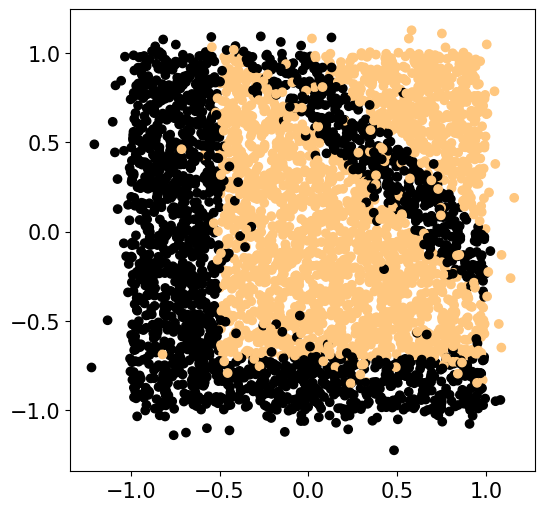

In [56]:
plt.figure(figsize = (6,6))
plt.scatter(x_train_aug[:,0],x_train_aug[:,1],c=y_train_aug,cmap=cm.copper)
plt.show

In [58]:
fit = clf.fit(x_train_aug, y_train_aug,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=False)


Model compiled successfully! Optimizer:  Nadam  Activation:  selu


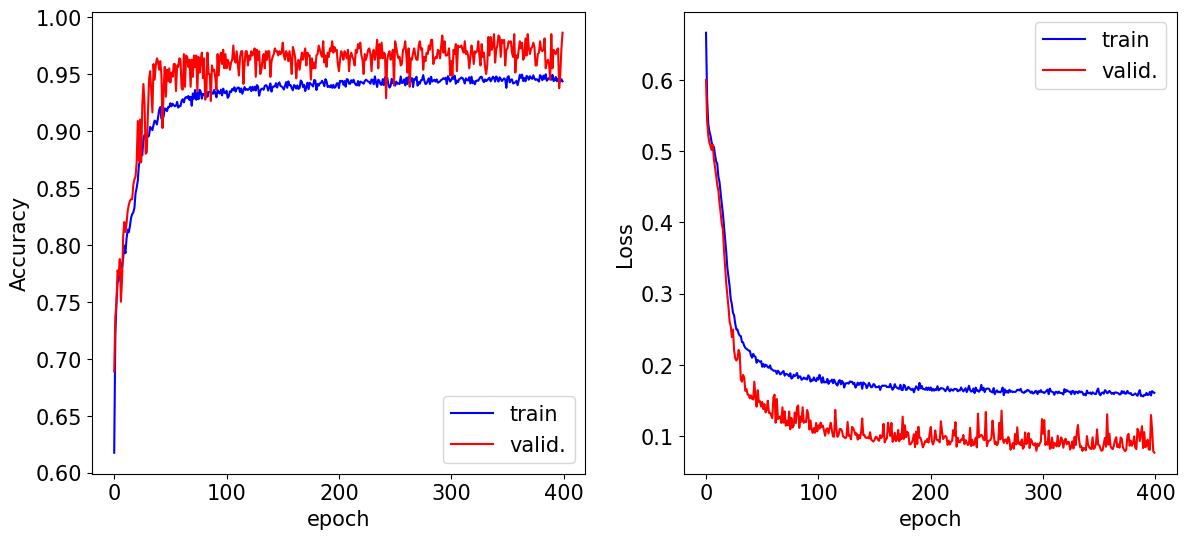

In [59]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

16/16 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9862

Test accuracy: 0.9862499833106995


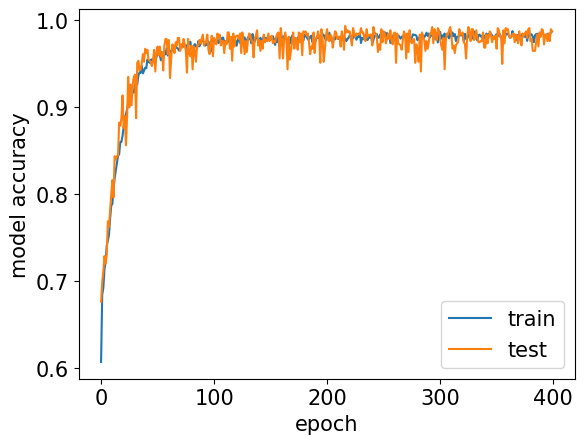

In [60]:
# Evaluate model
score = clf.score(x_valid, y_valid,verbose=1)

# Print performance
print()
print('Test accuracy:', score)

# Look into training history
# Fit returns a History object. 
# Its History.history attribute is a record of training loss values and metrics values at successive epochs, 
# as well as validation loss values and validation metrics values.
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()